# Model Training

This notebook trains the below mentioned models.
1. Linear Model (logistic regression)
2. Tree (Decision tree regressor)
3. Ensemble (Random Forest regressor)

All the cells of this notebook, can be executed in a single run. The dimensionality reduction block is not needed if the data files (xtraindr.pkl, xvaldr.pkl, xtestdr.pkl) are loaded from its corresponding pickle files in "Loading pickle files" section.


In [ ]:
#from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Loading pickle files

The following data are stored as pickled files for future use. 
1. cleaned training data
2. cleaned test data
3. training labels (yactual)
4. test labels (ytest)
5. tfidf vectors of all data (train_tfidf, test_tfidf, val_tfidf)
6. Dimensionality reduced vectors of all data (xtraindr, xvaldr, xtestdr)

Storing pickle files helps to easily load the data for later use without executing all the code snippets again.

In [ ]:
#Reading pickled train data
with open ('/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptraindata1.pkl', 'rb') as fp:
    train_data = pickle.load(fp)

train_data[:5]

['dismal lukewarm glop waiter manager see us barely nibble entree plate shove forward pickup thank us perfunctorily patronage hill country jail serve grub bad protection never never never back yard house real food',
 'love really atmosphere cozy festive shrimp house fry fry sometimes good sometimes great spicy dipping sauce come die beer list amazing cocktail great price cheap dive go every week rather treat try will not disappoint',
 'actually horrify place still business year old son need haircut past summer lure cut sign get door wait minute stylist work people place total garbage tacky sofa time sofa giant son notice ant crawl floor furniture disgusting walk actually turn around walk upon enter do not old black male stylist finish haircut turn tell want clipper around back side hand cut top standard boy cut really freak simple right wrong rather use clipper go actually cut hair go use move downward do not cut hair rub man allege cosmetology license know use set clipper realize almo

In [ ]:
#Reading pickled test data
with open ('/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptestdata1.pkl', 'rb') as fp:
    xtest = pickle.load(fp)

xtest[:5]

['go bunch friend amazing time diva fun show professional cast dancer together th queen true character blow us away frank us laugh entire show well would advise anyone everyone come show',
 'place amazing fry chicken good day get rice come piece chicken purple rice delicious can not describe super crispy also super juicy drizzle chicken sauce like mayonnaise blow mind excited eat forget take picture fear ill back sure',
 ' year old washing machine repair actually good experience call late yesterday come today time say would think serviceman positive anyway super courteous waste time find problem show debris line water backing definitely recommend affordable appliance use hopefully will not need near future also service fee go toward repair lot less company call',
 'broil haddock good stuff mushroom outstanding good brandy old fashioned obviously popular destination make reservation content mill around bar bit nice atmosphere work casual night right water go back',
 'love bar bartender 

In [ ]:
#loading stored training and test labels
yactual = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptrainlabels.pkl", "rb"))
print(f"The length of training labels is {len(yactual)}")
ytest = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/yelptestlabels.pkl", "rb"))
print(f"The length of test labels is {len(ytest)}")

The length of training labels is 599995
The length of test labels is 149995


In [ ]:
#loading data tfidf vectors
xtrain_tfidf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/train_tfidf.pkl", "rb"))
xval_tfidf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/val_tfidf.pkl", "rb"))
xtest_tfidf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/test_tfidf.pkl", "rb"))

In [ ]:
xtraindr = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xtraindr.pkl", "rb"))
print(f"xtraindr shape: {xtraindr.shape}")
xvaldr = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xvaldr.pkl", "rb"))
print(f"xvaldr shape: {xvaldr.shape}")
xtestdr = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xtestdr.pkl", "rb"))
print(f"xtestdr shape: {xtestdr.shape}")

xtraindr shape: (479996, 100)
xvaldr shape: (119999, 100)
xtestdr shape: (149995, 100)


In [ ]:
print(f"xtraindr shape: {xtraindr.shape}")
print(f"xvaldr shape: {xvaldr.shape}")
print(f"xtestdr shape: {xtestdr.shape}")

xtraindr shape: (479996, 100)
xvaldr shape: (119999, 100)
xtestdr shape: (149995, 100)


# Train test split

To evaluate the model training, training data is further split into train and validation data.

In [ ]:
#splitting into training and validation data
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(train_data, yactual, test_size=0.2, random_state=42)
# print(xtrain.shape)
# print(xval.shape)
# print(ytrain.shape)
# print(yval.shape)

In [ ]:
print(f"The length of the training data is {len(xtrain)}")
print(f"The length of the validation data is {len(xval)}")

The length of the training data is 479996
The length of the validation data is 119999


# Model performance analysis

In [ ]:
# Squared error
# Regression error metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def evaluate_model(ytrain, ypred):
    mse = mean_squared_error(ytrain, ypred)
    print(f"Mean squared error: {mse}")
    mae = mean_absolute_error(ytrain, ypred)
    print(f"Mean absolute error: {mae}")
    r2 = r2_score(ytrain, ypred)
    print(f"r2 score: {r2}")
    rmse = np.sqrt(mse)
    print(f"Root mean squared error: {rmse}")

    return rmse, mse, mae, r2

# Buliding Regression models

In [ ]:
from sklearn.pipeline import Pipeline

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler

#dimensionality reduction
from sklearn.decomposition import SparsePCA,PCA,TruncatedSVD

#Regression algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Dimensionality Reduction

The dimensionality reduced data is stored as xtraindr.pkl, xvaldr.pkl, xtestdr.pkl. The dimensions are reduced using SVD (Singular value decomposition).

so, the cells under dimensionality reduction can be skipped if xtraindr, xvaldr and xtestdr vectors are already loaded from there corresponding pickle files.

Note: "Loading pickle files" section loads all the data.

In [ ]:
#Dimensionality Reduction

#spca = SparsePCA() #requires toarray() conversion
#pca = PCA()

#TruncatedSVD, error rate is worst when reduced to 2 dimensions
#tsvd = TruncatedSVD(random_state=42)
# xtraindr = tsvd.fit_transform(xtrain_tfidf)
# xvaldr = tsvd.fit_transform(xval_tfidf)

# preferred n_components is 100 for tfidf vectors' dimensionality reduction
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html 
lsa = TruncatedSVD(n_components=100,random_state=42)
xtraindr = lsa.fit_transform(xtrain_tfidf)
xvaldr = lsa.fit_transform(xval_tfidf)
xtestdr = lsa.fit_transform(xtest_tfidf)

#xtraindr.components_

In [ ]:
#loading dimensionality reduced data
# pickle.dump(xtraindr, open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xtraindr.pkl","wb"))
# pickle.dump(xvaldr, open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xvaldr.pkl","wb"))
# pickle.dump(xtestdr, open("/data/cmpe297-F2020-guzun/yelp/pickle-files/xtestdr.pkl","wb"))

In [ ]:
xtraindr.shape

(479996, 100)

In [ ]:
tsvd.explained_variance_ratio_

array([0.0046358 , 0.00623875])

In [ ]:
lsa.explained_variance_ratio_

array([0.00469621, 0.0064916 , 0.00424128, 0.00386589, 0.00356252,
       0.0031017 , 0.00293413, 0.00270248, 0.00260483, 0.0025632 ,
       0.00240413, 0.0023006 , 0.00224552, 0.0022058 , 0.00216639,
       0.00209736, 0.00206982, 0.00199859, 0.00199576, 0.00192747,
       0.0018917 , 0.00187321, 0.00183027, 0.00179225, 0.00176904,
       0.00175388, 0.00173971, 0.00173057, 0.00170473, 0.00167209,
       0.00164466, 0.00162255, 0.00160907, 0.00157045, 0.00154585,
       0.00153392, 0.00151345, 0.0014935 , 0.00147642, 0.00146612,
       0.00142908, 0.00142391, 0.00141853, 0.00140104, 0.00139508,
       0.00137875, 0.00136229, 0.00134506, 0.00133839, 0.00131588,
       0.00130348, 0.00128884, 0.0012769 , 0.00126816, 0.00126536,
       0.00125417, 0.00124271, 0.00123588, 0.00122681, 0.00121998,
       0.00122025, 0.00120804, 0.00119093, 0.00117906, 0.00117039,
       0.00116102, 0.00114496, 0.00114298, 0.00113275, 0.00112566,
       0.00111414, 0.00110504, 0.0010876 , 0.00108052, 0.00107

In [ ]:
lsa.n_components

100

## Building models

Models are trained using training data, and validated using validation data. Based on the feedback from the validation data, the model is retrained and the parameters are tuned as needed. At the end, the final best performing parameters of the model are evaluated on the test data.

Either tfidf or dimensionality reduced vectors are used.

In [ ]:
def get_dr(dr = "PCA", components = 10):
    dr_dict = {
        "PCA": PCA(n_components=components),
        "SVD": TruncatedSVD(n_components=components),
        "KBest": SelectKBest(chi2, k=components)
    }
    return dr_dict[dr]

In [ ]:
def get_classifier(classifier="LogR", arguments = None):
    classifier_dict = {
      "LogR": LogisticRegression(random_state=42, solver='saga', max_iter=1000),
      "LogR1": LogisticRegression(random_state=42, solver='saga', max_iter=100000, penalty='l1'),
      "RTR" : RandomForestRegressor(random_state=42),
      "RTR1" : RandomForestRegressor(random_state=42,min_samples_split=0.1, max_samples=50000, max_leaf_nodes=16, max_depth=80), 
      "RTR2" : RandomForestRegressor(random_state=42,min_samples_split=0.1, max_samples=50000, max_leaf_nodes=16, max_features=2, max_depth=80),
      "DTR1" : DecisionTreeRegressor(random_state=42,min_samples_split=10, min_samples_leaf=5, max_features=3, max_depth=80),
      "DTR2" : DecisionTreeRegressor(random_state=42,min_samples_split=0.3, min_samples_leaf=64, max_features=100, max_depth=90),
      "DTR3" : DecisionTreeRegressor(random_state=42,min_samples_split=0.1, min_samples_leaf=5, max_features=100, max_depth=100),
    }
    return classifier_dict[classifier]

### Logistic Regression

In [ ]:
#train_pipeline = Pipeline(steps=[("ss",StandardScaler(with_mean=False)),('classify', get_classifier("LogR"))])
#train_pipeline = Pipeline(steps=[("ss",MinMaxScaler()),('classify', get_classifier("LogR"))]) #cannot be applied on sparse input
#train_pipeline = Pipeline(steps=[("ss",MaxAbsScaler()),('classify', get_classifier("LogR"))]) #(0.714455953799615, 0.4916707639230327, 0.6445271660703461)
#train_pipeline = Pipeline(steps=[("ss",PowerTransformer()),('classify', get_classifier("LogR"))]) #powertransformer expects toarray() conversion which crashes the system
#train_pipeline.fit(xtrain_tfidf, ytrain) 
#ypred = train_pipeline.predict(xval_tfidf)

#after dimensionality reduction
train_pipeline = Pipeline(steps=[("ss",PowerTransformer()),('classify', get_classifier("LogR"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3 1 5 ... 5 1 4]
Model performance analysis with validation data
Mean squared error: 1.7974983124859374
Mean absolute error: 0.899340827840232
r2 score: 0.10566660446312448


(1.7974983124859374, 0.899340827840232, 0.10566660446312448)

In [ ]:
#standardscaler, logistic regression
evaluate_model(yval, ypred)

Mean squared error: 0.9405911715930966
Mean absolute error: 0.5769714747622897
r2 score: 0.5320150842648187


(0.9405911715930966, 0.5769714747622897, 0.5320150842648187)

In [ ]:
logregclf = LogisticRegression(random_state=42, solver='saga').fit(xtrain_tfidf, ytrain)
ypred = logregclf.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [4 2 3 ... 1 1 4]
Model performance analysis with validation data
Mean squared error: 0.6988058233818615
Mean absolute error: 0.47863732197768316
r2 score: 0.652313784939405


(0.6988058233818615, 0.47863732197768316, 0.652313784939405)

In [ ]:
logregclf = LogisticRegression(random_state=42, solver='saga',n_jobs=-1).fit(xtrain_tfidf, ytrain)
ypred = logregclf.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [4 2 5 ... 1 1 3]
Model performance analysis with validation data
Mean squared error: 0.7238476987308228
Mean absolute error: 0.4921291010758423
r2 score: 0.6398543655030249
Root mean squared error: 0.8507923946127062


(0.8507923946127062,
 0.7238476987308228,
 0.4921291010758423,
 0.6398543655030249)

In [ ]:
pickle.dump(logregclf, open("/data/cmpe297-F2020-guzun/yelp/final-models/lrfinal.pkl","wb"))

In [ ]:
#logregclf = pickle.load(open("/data/cmpe297-F2020-guzun/yelp/final-models/lrfinal.pkl", "rb"))

In [ ]:
#prediction on test data with best model trained for logistic regression
ytestpred = logregclf.predict(xtest_tfidf)
print(f"The predictions are {ytestpred}")
print("Model performance analysis with test data")
evaluate_model(ytest, ytestpred)

The predictions are [5 5 5 ... 2 1 2]
Model performance analysis with test data
Mean squared error: 0.7308310277009233
Mean absolute error: 0.49754325144171474
r2 score: 0.6345844861495383
Root mean squared error: 0.8548865583812412


(0.8548865583812412,
 0.7308310277009233,
 0.49754325144171474,
 0.6345844861495383)

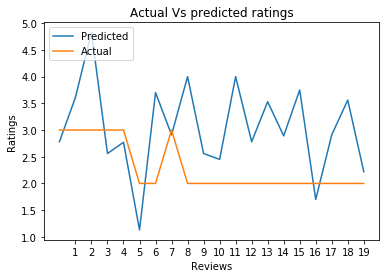

In [ ]:
#plot on test data with best model trained for logistic regression
# plt.plot(ytestpred[3000:3020], label = 'Predicted')
# plt.plot(ytest[3000:3020], label = 'Actual')
lim = 119990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings")
plt.savefig("/data/cmpe297-F2020-guzun/yelp/testplots/lrtestplot.png")

Text(0.5,1,'Actual Vs predicted sales')

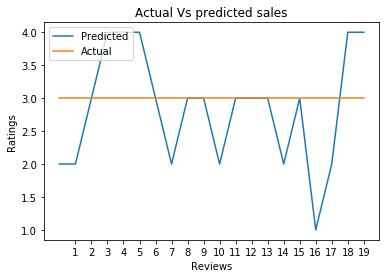

In [ ]:
lim = 101210
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted Ratings")

In [ ]:
train_pipeline = Pipeline(steps=[("ss",MaxAbsScaler()),('classify', get_classifier("LogR"))])
train_pipeline.fit(xtrain_tfidf, ytrain)
ypred = train_pipeline.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [4 1 3 ... 1 1 3]
Model performance analysis with validation data
Mean squared error: 0.7302977524812707
Mean absolute error: 0.49906249218743487
r2 score: 0.6366451839244032
Root mean squared error: 0.8545746032274015


(0.8545746032274015,
 0.7302977524812707,
 0.49906249218743487,
 0.6366451839244032)

In [ ]:
#have to run - 3
n_folds = 5 

param_grid = {
    'solver': ['saga','sag'],
    'max_iter': [1000, 5000, 10000, 100000],
    'penalty': ['l1','l2','elasticnet'],           
}
logregclf=LogisticRegression(random_state=42)
grid =RandomizedSearchCV(logregclf,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=n_folds)

result = grid.fit(xtraindr, ytrain) 
print(result.best_params_)

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000}


In [ ]:
#after dimensionality reduction
train_pipeline = Pipeline(steps=[('classify', get_classifier("LogR1"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [4 1 1 ... 1 1 4]
Model performance analysis with validation data
Mean squared error: 1.747256227135226
Mean absolute error: 0.8640988674905624
r2 score: 0.13066422169504976
Root mean squared error: 1.3218382000590034


(1.3218382000590034,
 1.747256227135226,
 0.8640988674905624,
 0.13066422169504976)

Text(0.5,1,'Actual Vs predicted ratings')

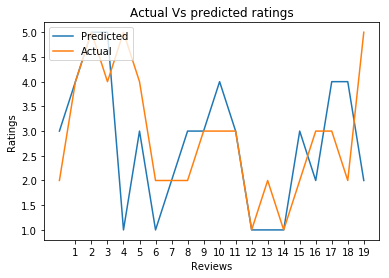

In [ ]:
plt.plot(ypred[110000:110020], label = 'Predicted')
plt.plot(yval[110000:110020], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings")

### RandomForestRegressor

In [ ]:
#train_pipeline = Pipeline(steps=[("ss",PowerTransformer()),('classify', get_classifier("LogR"))])
train_pipeline = Pipeline(steps=[('classify', get_classifier("RTR"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3.16 1.39 2.55 ... 1.28 1.91 3.95]
Model performance analysis with validation data
Mean squared error: 1.1682387705809747
Mean absolute error: 0.8724908709361355
r2 score: 0.418750527199907


(1.1682387705809747, 0.8724908709361355, 0.418750527199907)

In [ ]:
def_rf_mse =1.1682387705809747
print(f"The rmse of RF when tried with default parameters: {np.sqrt(def_rf_mse)}")

The rmse of RF when tried with default parameters: 1.080850947439551


In [ ]:
train_pipeline = Pipeline(steps=[('classify', get_classifier("RTR"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3.61333333 1.14       1.7        ... 1.35       1.72       3.48      ]
Model performance analysis with validation data
Mean squared error: 1.1614866623894688
Mean absolute error: 0.8686310752554075
r2 score: 0.42210999396768956
Root mean squared error: 1.0777229061263702


(1.0777229061263702,
 1.1614866623894688,
 0.8686310752554075,
 0.42210999396768956)

In [ ]:
#pickle.dump(train_pipeline, open("/data/cmpe297-F2020-guzun/yelp/final-models/rffinal.pkl","wb"))

In [ ]:
#predicting on test data with best model trained for Random forest
ytestpred = train_pipeline.predict(xtestdr)
print(f"The predictions are {ytestpred}")
print("Model performance analysis with test data")
evaluate_model(ytest, ytestpred)

The predictions are [2.83 3.25 2.18 ... 4.21 2.32 3.86]
Model performance analysis with test data
Mean squared error: 1.4311029289843213
Mean absolute error: 0.9840027317220611
r2 score: 0.28444853550783933
Root mean squared error: 1.1962871431994584


(1.1962871431994584,
 1.4311029289843213,
 0.9840027317220611,
 0.28444853550783933)

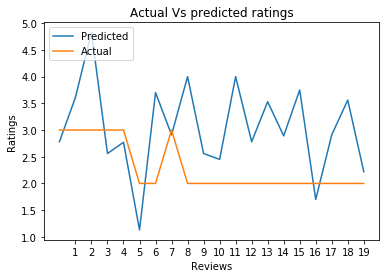

In [ ]:
#plot on test data with best model trained for Random forest
lim = 119990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings")
plt.savefig("/data/cmpe297-F2020-guzun/yelp/testplots/rftestplot.png")

Text(0.5,1,'Actual Vs predicted ratings')

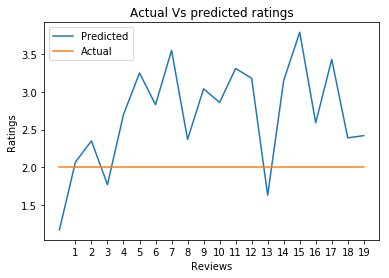

In [ ]:
lim = 140990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings")

In [ ]:
n_folds = 10 

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,20,30,50,100,200],
    'max_leaf_nodes': [3, 4, 5, 8, 16, 32, 64],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_samples': [200, 500, 10000, 50000, 100000]
}
rfclf=RandomForestRegressor(random_state=42)
grid =RandomizedSearchCV(rfclf,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=n_folds)

result = grid.fit(xtraindr, ytrain) 
print(result.best_params_)

{'min_samples_split': 0.1, 'max_samples': 50000, 'max_leaf_nodes': 16, 'max_features': 2, 'max_depth': 80}


In [ ]:
#RandomForestRegressor with dimensionality reduced data
#{'min_samples_split': 0.1, 'max_samples': 50000, 'max_leaf_nodes': 16,'max_depth': 80}
train_pipeline = Pipeline(steps=[('classify', get_classifier("RTR1"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [2.9998384 2.9998384 2.9998384 ... 2.9998384 2.9998384 2.9998384]
Model performance analysis with validation data
Mean squared error: 2.0098752134477875
Mean absolute error: 1.2043335689530748
r2 score: -1.1780941511219112e-07
Mean squared error: 1.4177006783689523


(1.4177006783689523,
 2.0098752134477875,
 1.2043335689530748,
 -1.1780941511219112e-07)

In [ ]:
#RandomForestRegressor with dimensionality reduced data
#{'min_samples_split': 0.1, 'max_samples': 50000, 'max_leaf_nodes': 16, 'max_features': 2, 'max_depth': 80}
train_pipeline = Pipeline(steps=[('classify', get_classifier("RTR2"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [2.9998384 2.9998384 2.9998384 ... 2.9998384 2.9998384 2.9998384]
Model performance analysis with validation data
Mean squared error: 2.0098752134477875
Mean absolute error: 1.2043335689530748
r2 score: -1.1780941511219112e-07
Mean squared error: 1.4177006783689523


(1.4177006783689523,
 2.0098752134477875,
 1.2043335689530748,
 -1.1780941511219112e-07)

### DecisionTreeRegressor

In [ ]:
#train_pipeline = Pipeline(steps=[("ss",PowerTransformer()),('classify', get_classifier("LogR"))])
train_pipeline = Pipeline(steps=[('classify', get_classifier("DTR"))])
train_pipeline.fit(xtraindr, ytrain) 
ypred = train_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [5. 1. 3. ... 1. 1. 5.]
Model performance analysis with validation data
Mean squared error: 2.3640104830323785
Mean absolute error: 1.1243347700974433
r2 score: -0.17619777870676412


(2.3640104830323785, 1.1243347700974433, -0.17619777870676412)

In [ ]:
#train_pipeline = Pipeline(steps=[("ss",PowerTransformer()),('classify', get_classifier("LogR"))])
dtr_pipeline = Pipeline(steps=[('classify', get_classifier("DTR"))])
dtr_pipeline.fit(xtrain_tfidf, ytrain) 
ypred = dtr_pipeline.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [5. 1. 3. ... 1. 1. 3.]
Model performance analysis with validation data
Mean squared error: 1.6810556754639623
Mean absolute error: 0.8915574296452471
r2 score: 0.1636018682849344


(1.6810556754639623, 0.8915574296452471, 0.1636018682849344)

In [ ]:
n_folds = 5 

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}
dtclf=DecisionTreeRegressor()
grid =RandomizedSearchCV(dtclf,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=n_folds)
# fitting the model for grid search 

result = grid.fit(xtraindr, ytrain) 
print(result.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 3, 'max_depth': 80}


In [ ]:
#DecisionTreeRegression with dimensionality reduced data with random search hypertuned parameters
dtr_pipeline = Pipeline(steps=[('classify', get_classifier("DTR1"))])
dtr_pipeline.fit(xtraindr, ytrain) 
ypred = dtr_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3.         1.2        1.625      ... 2.83333333 1.         5.        ]
Model performance analysis with validation data
Mean squared error: 2.4308611886811664
Mean absolute error: 1.2335977827796507
r2 score: -0.2094589051076181
Mean squared error: 1.5591219287410354


(1.5591219287410354,
 2.4308611886811664,
 1.2335977827796507,
 -0.2094589051076181)

In [ ]:
n_folds = 5 

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,20,30,50,100,200],
    'min_samples_leaf': [3, 4, 5, 8, 16, 32, 64],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
}
dtclf=DecisionTreeRegressor()
grid =RandomizedSearchCV(dtclf,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=n_folds)
# fitting the model for grid search 

result = grid.fit(xtraindr, ytrain) 
print(result.best_params_)
#{'min_samples_split': 0.3, 'min_samples_leaf': 64, 'max_features': 100, 'max_depth': 90}
#{'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 100, 'max_depth': 100}

{'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 100, 'max_depth': 100}


In [ ]:
#DecisionTreeRegression with dimensionality reduced data with random search hypertuned parameters
#{'min_samples_split': 0.3, 'min_samples_leaf': 64, 'max_features': 100, 'max_depth': 90}
dtr_pipeline = Pipeline(steps=[('classify', get_classifier("DTR2"))])
dtr_pipeline.fit(xtraindr, ytrain) 
ypred = dtr_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3.40314668 2.08972025 2.08972025 ... 2.08972025 2.08972025 2.8104268 ]
Model performance analysis with validation data
Mean squared error: 1.5045060773786705
Mean absolute error: 1.0047905359173446
r2 score: 0.25144295299667585
Mean squared error: 1.2265830902872705


(1.2265830902872705,
 1.5045060773786705,
 1.0047905359173446,
 0.25144295299667585)

In [ ]:
#DecisionTreeRegression with dimensionality reduced data with random search hypertuned parameters
#{'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 100, 'max_depth': 100}
dtr_pipeline = Pipeline(steps=[('classify', get_classifier("DTR3"))])
dtr_pipeline.fit(xtraindr, ytrain) 
ypred = dtr_pipeline.predict(xvaldr)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3.32743393 1.43194285 2.15216036 ... 2.20715774 1.43194285 2.99462156]
Model performance analysis with validation data
Mean squared error: 1.3418721209960305
Mean absolute error: 0.9398735624238912
r2 score: 0.332360402226504
Root mean squared error: 1.1583920411484319


(1.1583920411484319, 1.3418721209960305, 0.9398735624238912, 0.332360402226504)

In [ ]:
#prediction on test data with best model trained for Decision tree
ytestpred = dtr_pipeline.predict(xtestdr)
print(f"The predictions are {ytestpred}")
print("Model performance analysis with test data")
rmse, mse, mae, r2 = evaluate_model(ytest, ytestpred)
print(f"rmse: {rmse}, mse: {mse}, mae: {mae}, r2: {r2}")

The predictions are [2.15216036 3.32743393 2.20715774 ... 4.35115192 1.76742036 3.05682442]
Model performance analysis with test data
Mean squared error: 1.5112182409204795
Mean absolute error: 1.0132468882964338
r2 score: 0.24439087953976024
Root mean squared error: 1.2293161680058062
rmse: 1.2293161680058062, mse: 1.5112182409204795, mae: 1.0132468882964338, r2: 0.24439087953976024


In [ ]:
#pickle.dump(dtr_pipeline, open("/data/cmpe297-F2020-guzun/yelp/final-models/dtfinal.pkl","wb"))

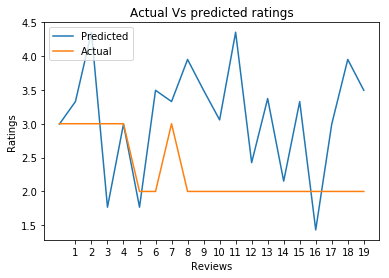

In [ ]:
#plot on test data with best model trained for Decision tree
lim = 119990
plt.plot(ytestpred[lim:lim+20], label = 'Predicted')
plt.plot(ytest[lim:lim+20], label = 'Actual')
plt.legend(loc = 'upper left')
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.xticks(np.arange(1,20))
plt.title("Actual Vs predicted ratings")
#plt.savefig("/data/cmpe297-F2020-guzun/yelp/testplots/testplot.png")

In [ ]:
n_folds = 5 

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,20,30,50,100,200],
    'min_samples_leaf': [3, 4, 5, 8, 16, 32, 64],
    'min_samples_split': [0.1, 0.2, 0.3],
}
dtclf=DecisionTreeRegressor()
grid =RandomizedSearchCV(dtclf,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=n_folds)
# fitting the model for grid search 

result = grid.fit(xtrain_tfidf, ytrain) 
print(result.best_params_)

In [ ]:
#DecisionTreeRegression with tfidf data with random search hypertuned parameters
dtr_pipeline = Pipeline(steps=[('classify', get_classifier("DTR1"))])
dtr_pipeline.fit(xtrain_tfidf, ytrain) 
ypred = dtr_pipeline.predict(xval_tfidf)
print(f"The predictions are {ypred}")
print("Model performance analysis with validation data")
evaluate_model(yval, ypred)

The predictions are [3.02165836 3.02165836 3.02165836 ... 3.02165836 3.02165836 3.02165836]
Model performance analysis with validation data
Mean squared error: 1.990120295917963
Mean absolute error: 1.2013167249254577
r2 score: 0.009828810735482807
Mean squared error: 1.410716235079884


(1.410716235079884,
 1.990120295917963,
 1.2013167249254577,
 0.009828810735482807)